<a href="https://colab.research.google.com/github/AilingLiu/data_driven_in_business/blob/master/Design_Measuring_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# common imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from __future__ import division

#import plotly.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

#initiate visualization library for jupyter notebook 
pyoff.init_notebook_mode()


# display dataframe
pd.set_option('max_columns', 20)
pd.set_option('max_colwidth', 40)

# create the project directory
ROOT_DIR = '.'
PROJECT_ID = 'BUSINESS_OPTIMISATION'
PROJECT_DIR = os.path.join(ROOT_DIR, PROJECT_ID)

DATA_DIR = os.path.join(PROJECT_DIR, 'DATASETS')
os.makedirs(DATA_DIR)

IMAGE_DIR = os.path.join(PROJECT_DIR, 'IMAGES')
os.makedirs(IMAGE_DIR)

# where to store the images
def save_fig(figname, path=IMAGE_DIR, format='png', tight_layout=True, dpi=400):
  filepath=os.path.join(path, figname+'.'+format)
  print('Image saved in: ', filepath)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(figname, dpi=dpi, format=format)

# display the figure correctly
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Get data

In [0]:
import urllib
from zipfile import ZipFile

URL = 'https://storage.googleapis.com/kaggle-data-sets/3466/5596/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1574104956&Signature=eOyN%2B6NNNHjfw9agLgqsBtzeGLF6B583LTlaLrfbYJEc9NK1b6Lo9w2BCF4zFvn4FYydyj62n3s%2BethLRKsqF0IuLWPwYd6r7CzkpwEs3%2FPhOrRWoMsnUXiSUk741%2FyxKGlw%2FqFoqNtRkX24shBTRayqHWAv15sL4OJxlHXNMrpX9esjdKG%2Feqd7qPd7XONf8d4DfTnGF35V0KeUNC1tnCZiukyePttx8PVFUaF78kJNj18XxoeAMd3HQ0GHfVdYVjdaWx9t7HE2%2BAgJB5Mw%2BoNcNZq4ma2VarYV07Q9%2B7sYn0Zr4sPHw9gqQJMj9NnJpvV%2BULI97YdQtmJWyYzCdQ%3D%3D&response-content-disposition=attachment%3B+filename%3Donlineretail.zip'

def fetch_data(link=URL, path=DATA_DIR):
  if not os.path.isdir(path):
    os.makedirs(path)
  file_path = os.path.join(path, 'retail.zip')
  urllib.request.urlretrieve(link, file_path)
  print('Data is downloaded in: ', file_path)
  zip_ = ZipFile(file_path, 'r')
  zip_.extractall(path)
  zip_.close()
  print('Extracted files as below: \n')
  print(os.listdir(path))

In [14]:
fetch_data()

Data is downloaded in:  ./BUSINESS_OPTIMISATION/DATASETS/retail.zip
Extracted files as below: 

['retail.zip', 'OnlineRetail.csv']


In [21]:
# Take a look
!sed -n -e 1p -e 27,35p 'BUSINESS_OPTIMISATION/DATASETS/OnlineRetail.csv'

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
536369,21756,BATH BUILDING BLOCK WORD,3,12/1/2010 8:35,5.95,13047,United Kingdom
536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583,France
536370,22727,ALARM CLOCK BAKELIKE RED ,24,12/1/2010 8:45,3.75,12583,France
536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583,France
536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583,France
536370,21883,STARS GIFT TAPE ,24,12/1/2010 8:45,0.65,12583,France
536370,10002,INFLATABLE POLITICAL GLOBE ,48,12/1/2010 8:45,0.85,12583,France
536370,21791,VINTAGE HEADS AND TAILS CARD GAME ,24,12/1/2010 8:45,1.25,12583,France
536370,21035,SET/2 RED RETROSPOT TEA TOWELS ,18,12/1/2010 8:45,2.95,12583,France


In [0]:
# Load the data
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M')

def load_data(path=DATA_DIR):
  filepath=os.path.join(path, 'OnlineRetail.csv')
  return pd.read_csv(filepath, delimiter=',', parse_dates=['InvoiceDate'], infer_datetime_format=True, date_parser=dateparse, encoding='iso8859_2')

In [39]:
retail = load_data()
retail.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


# Describe the data

In [42]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


This dataset has 541,909 row, and 8 attributes. There are missing values in `Description`, `CustomerID`. 

Therea re one datetime format from `InvoiceDate`, and two numerical attributes from `Quantity`, `UnitPrice`. 

`CustomerID` should be categorical variable only.

In [0]:
retail['CustomerID'] = retail['CustomerID'].astype('object')

In [48]:
retail.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


Image saved in:  ./BUSINESS_OPTIMISATION/IMAGES/Scaterplot_of_retail_num_attributes.png


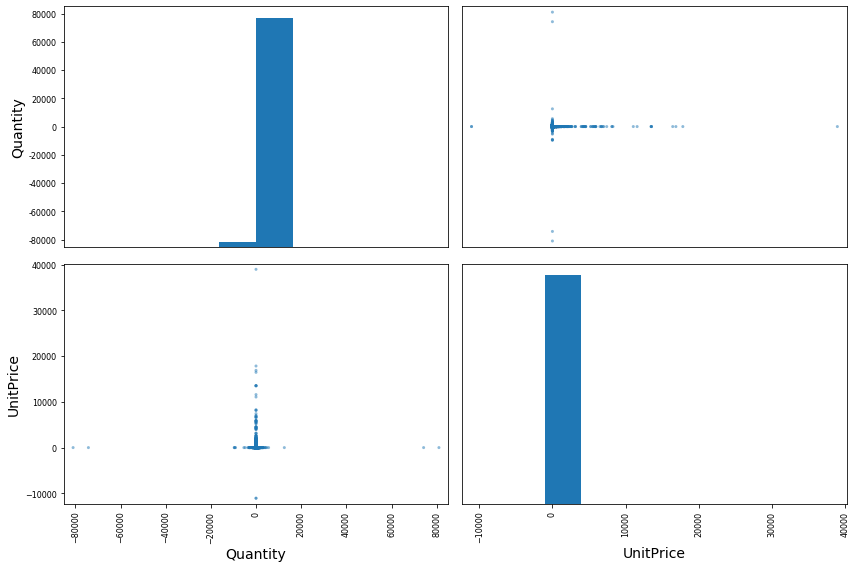

In [46]:
from pandas.plotting import scatter_matrix

scatter_matrix(retail, figsize=(12, 8))
save_fig('Scaterplot_of_retail_num_attributes')

Both `quantity` and `unitprice` are tail-heavy. They have negative value that don't make sense. While 75% of the data fall below 10, their outliers go to 81k and 39k.

In [50]:
retail.query('Quantity < 0').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


In [51]:
retail.query('UnitPrice < 0').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


From their description, it looks like those negative digits are debt or discount which appear to be valid.

# North Star Metric



`'The North Star Metric is the single metric that best captures the core value that your product delivers to customers.'`

`'To uncover your North Star Metric you must understand the value your most loyal customers get from using your product. Then you should try to quantify this value in a single metric. There may be more than one metric that works, but try to boil it down to a single NSM.'`

-- by [Sean Ellis](https://blog.growthhackers.com/what-is-a-north-star-metric-b31a8512923f)

Let's start to build our north star metric:

$Revenue = Active Customer Count * Order Count * Average Revenue per Order$

# Revenue analysis

In [56]:
# revenue by month
retail['revenue'] = retail['Quantity'] * retail['UnitPrice']
retail_rev_by_month = retail.groupby(retail.InvoiceDate.dt.to_period('M'))['revenue'].sum().to_frame('Revenue')
retail_rev_by_month

,Revenue
InvoiceDate,
2010-12,748957.020
2011-01,560000.260
2011-02,498062.650
2011-03,683267.080
2011-04,493207.121
2011-05,723333.510
2011-06,691123.120
2011-07,681300.111
2011-08,682680.510


Image saved in:  ./BUSINESS_OPTIMISATION/IMAGES/time_series_of_revenue_by_month.png


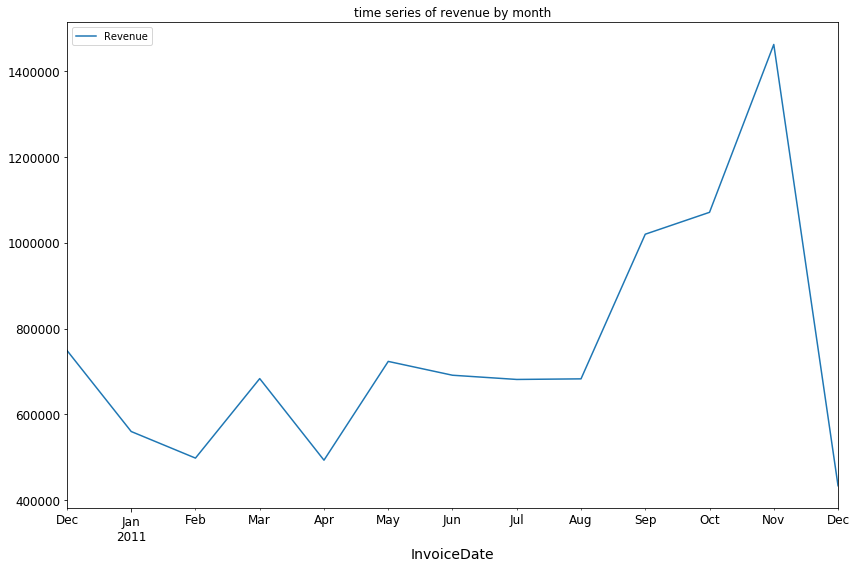

In [57]:
retail_rev_by_month.plot(kind='line',
                         figsize=(12, 8),
                         title='time series of revenue by month'
                         )
save_fig('time_series_of_revenue_by_month')


In [58]:
#calculate monthly revenue growth rate
retail_rev_by_month['MonthlyGrowth'] = retail_rev_by_month['Revenue'].pct_change()
retail_rev_by_month

,Revenue,MonthlyGrowth
InvoiceDate,,
2010-12,748957.020,NaN
2011-01,560000.260,-0.252293
2011-02,498062.650,-0.110603
2011-03,683267.080,0.371850
2011-04,493207.121,-0.278163
2011-05,723333.510,0.466592
2011-06,691123.120,-0.044530
2011-07,681300.111,-0.014213
2011-08,682680.510,0.002026


Image saved in:  ./BUSINESS_OPTIMISATION/IMAGES/Grow_Rate_by_Month.png


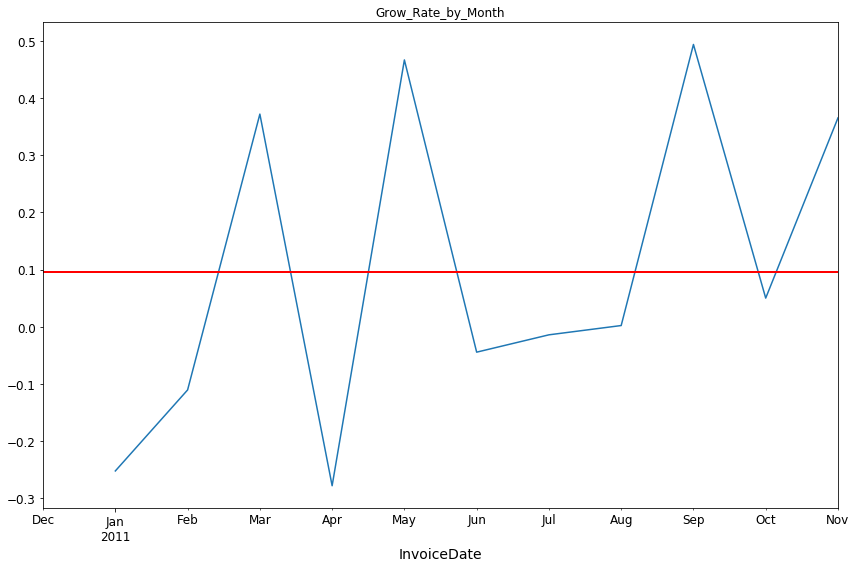

In [75]:
avg_growth = retail_rev_by_month.iloc[:-1, -1].mean()

ax = retail_rev_by_month.iloc[:-1, -1].plot(kind='line',
                         figsize=(12, 8),
                         title='Grow_Rate_by_Month'
                         )
ax.axhline(avg_growth, linewidth=2, color='r')

save_fig('Grow_Rate_by_Month')

Growth rate is up and down, in Nov 2011, it grows about 36.5%. But what happened to April, whose growth rate is -27.8%, not growing but dropping revenue.

# Monthly Active Customers

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

Image saved in:  ./BUSINESS_OPTIMISATION/IMAGES/country_distribution.png


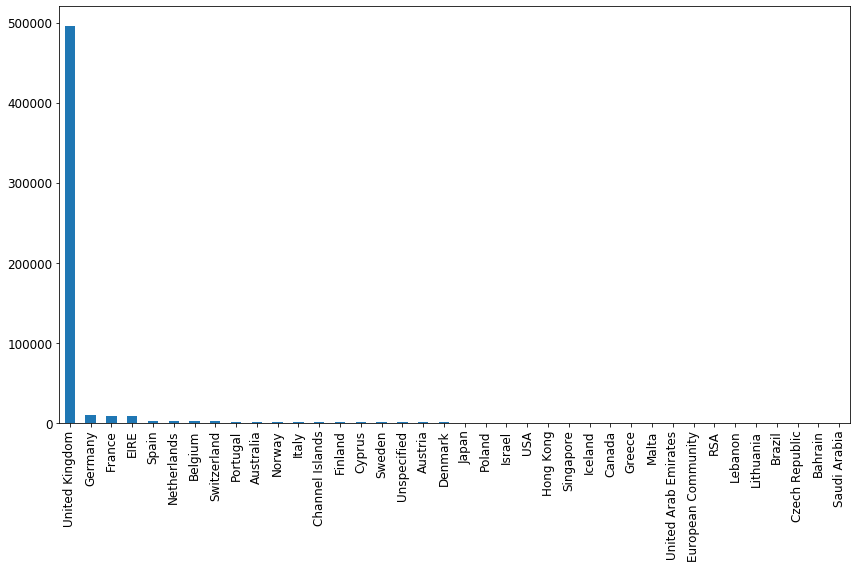

In [78]:
display(retail['Country'].value_counts())
retail['Country'].value_counts().plot(kind='bar', figsize=(12, 8))
save_fig('country_distribution')

Image saved in:  ./BUSINESS_OPTIMISATION/IMAGES/num_of_uk_customer_by_month.png


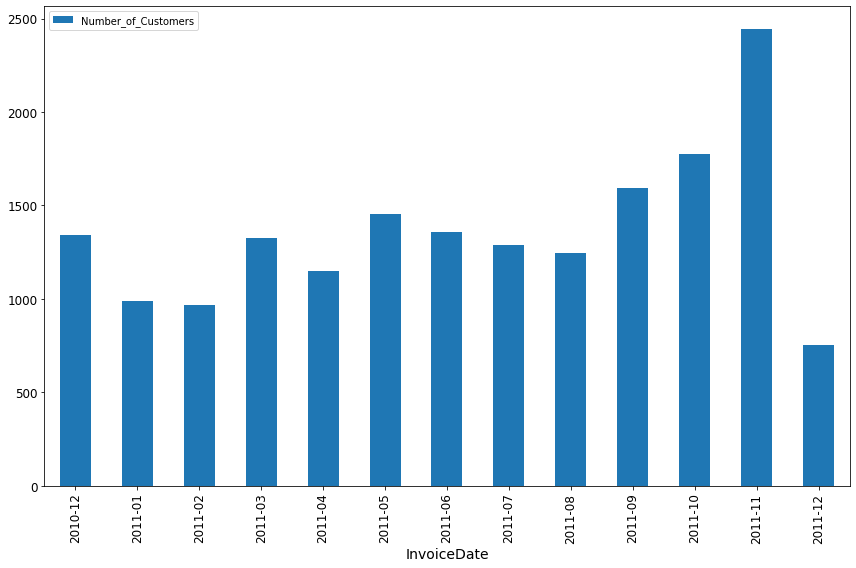

In [86]:
# Let's focus on only UK to see the active customers count
uk_retail = retail.query("Country == 'United Kingdom'")
customers_by_month = uk_retail.groupby(uk_retail.InvoiceDate.dt.to_period('M'))['CustomerID'].nunique().to_frame('Number_of_Customers')
customers_by_month.plot(kind='bar', figsize=(12, 8))
save_fig('num_of_uk_customer_by_month')

In [91]:
# customer growth rate
customers_by_month['growth_rate'] = customers_by_month['Number_of_Customers'].pct_change()
customers_by_month

,Number_of_Customers,growth_rate
InvoiceDate,,
2010-12,1343,NaN
2011-01,991,-0.262100
2011-02,970,-0.021191
2011-03,1324,0.364948
2011-04,1147,-0.133686
2011-05,1457,0.270270
2011-06,1358,-0.067948
2011-07,1288,-0.051546
2011-08,1246,-0.032609


Image saved in:  ./BUSINESS_OPTIMISATION/IMAGES/num_customer_change_by_month.png


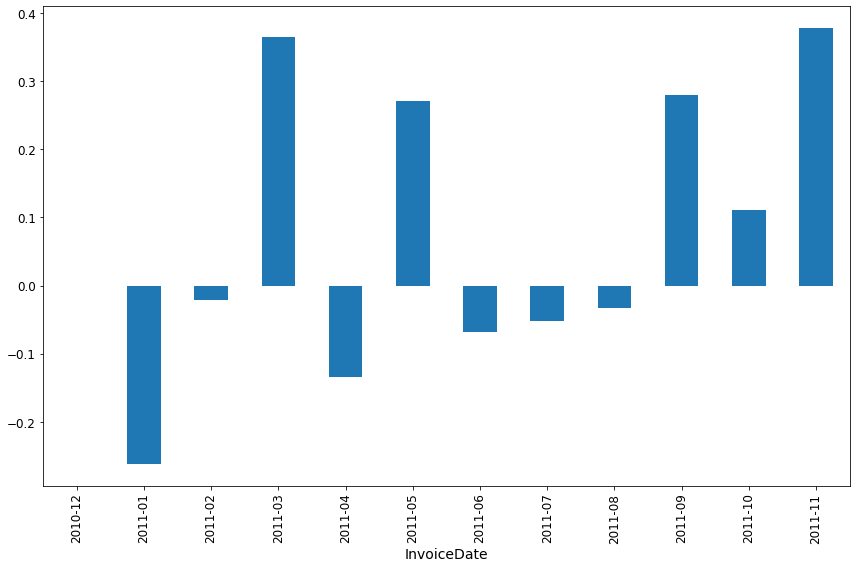

In [92]:
customers_by_month.iloc[:-1, -1].plot(kind='bar', figsize=(12, 8))
save_fig('num_customer_change_by_month')